In [1]:
import pandas as pd
import numpy as np

In [2]:
path='clean_df.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1


In [3]:
# we will study make vs price
df_mp = df[['make', 'price']]
df_mp = df_mp.groupby(['make'], as_index=False).mean()
df_mp.sort_values('price', inplace=True)
df_mp

,make,price
3,chevrolet,6007.000000
4,dodge,7875.444444
14,plymouth,7963.428571
5,honda,8184.692308
18,subaru,8541.250000
6,isuzu,8916.500000
11,mitsubishi,9239.769231
16,renault,9595.000000
19,toyota,9885.812500
20,volkswagen,10077.500000


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='make', ylabel='price'>

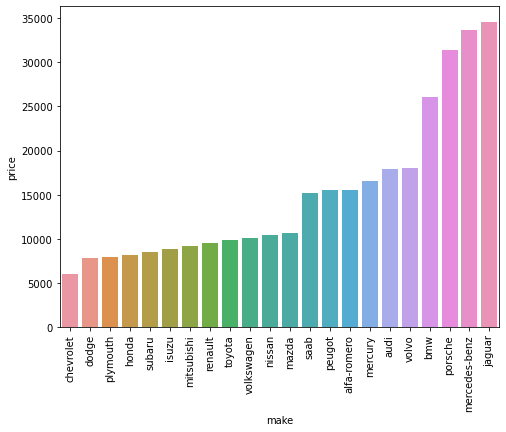

In [5]:
plt.figure(figsize=(20/2.54, 15/2.54))
plt.xticks(rotation=90)
sns.barplot(x='make', y='price', data=df_mp)

In [6]:
from scipy import stats

In [7]:
df_mp = df[['make', 'price']]
df_mp = df_mp.groupby(['make'])

target_make = 'honda'
for make in ['subaru', 'jaguar']:
    print(f"{target_make} vs {make}")
    res = stats.f_oneway(df_mp.get_group(target_make)["price"], 
                         df_mp.get_group(make)["price"])
    print(f"F-Value is {res.statistic}")
    print(f"P-Value is {res.pvalue}")
    print()

honda vs subaru
F-Value is 0.19744030127462606
P-Value is 0.6609478240622193

honda vs jaguar
F-Value is 400.925870564337
P-Value is 1.0586193512077862e-11



(0.0, 53526.60545872044)

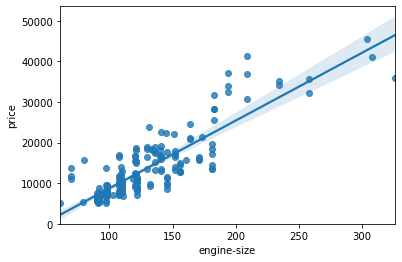

In [8]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0)

In [9]:
df["highway-mpg"] = 235 / df["highway-L/100km"]

(0.0, 48183.128586111394)

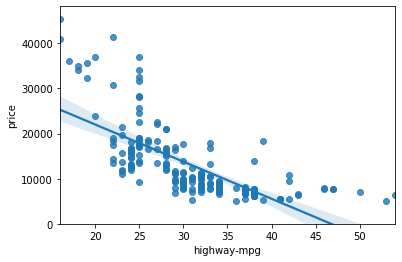

In [10]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0)

(0.0, 47414.1)

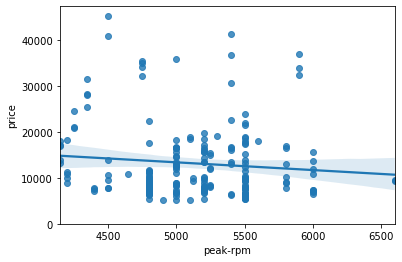

In [11]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0)

In [12]:
pearson_coef, pvalue = stats.pearsonr(df['horsepower'], df['price'])
print(f"Pearson coefficient: {pearson_coef}")
print(f"P-Value: {pvalue}")

Pearson coefficient: 0.809574567003656
P-Value: 6.369057428259557e-48


<AxesSubplot:>

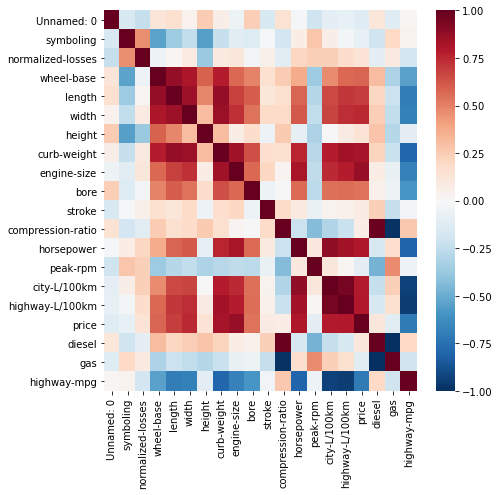

In [13]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), cmap="RdBu_r")

In [14]:
from sklearn.linear_model import LinearRegression
# define the predictor variable X and the target variable y
X = df[['highway-mpg']]
y = df['price']
# use linear regression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [15]:
print("yhat = ", lr.intercept_, "+", lr.coef_[0], ".x")

yhat =  38423.305858157386 + -821.7333783219252 .x


In [16]:
x = pd.DataFrame(data={"highway-mpg": [20]})

In [17]:
yhat = lr.predict(x)
print(f"price({x.iloc[0][0]} highway-mpg) = {yhat[0]}$")

price(20 highway-mpg) = 21988.638291718882$


In [18]:
# define the predictor variables
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']
# Use linear regression
mlr = LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [19]:
print('b0 = ', mlr.intercept_)
print('b1 = ', mlr.coef_[0])
print('b2 = ', mlr.coef_[1])
print('b3 = ', mlr.coef_[2])
print('b4 = ', mlr.coef_[3])

b0 =  -15806.624626329198
b1 =  53.49574422604928
b2 =  4.707700994613927
b3 =  81.53026382122758
b4 =  36.05748881648584


(0.0, 48173.51113664231)

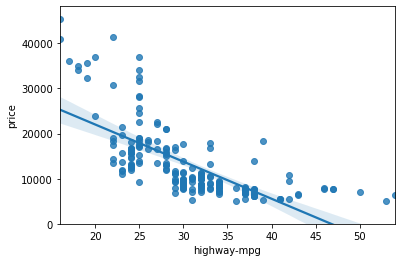

In [20]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

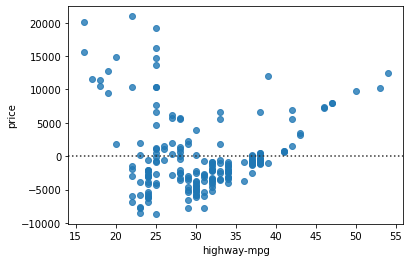

In [21]:
sns.residplot(x="highway-mpg", y="price", data=df)

<AxesSubplot:>

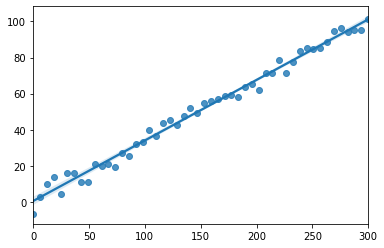

In [22]:
y1 = np.linspace(0, 100) + np.random.normal(scale=3, size=50)
x1 = np.linspace(0, 300)
sns.regplot(x=x1, y=y1)

<AxesSubplot:>

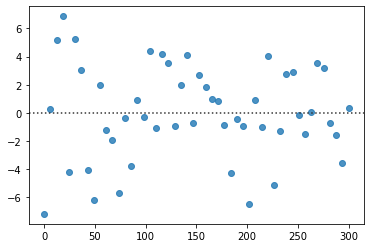

In [23]:
sns.residplot(x=x1, y=y1)

<AxesSubplot:>

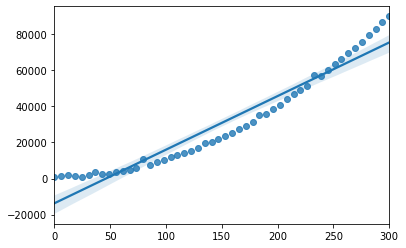

In [24]:
y1 = x1 * x1 + np.random.normal(scale=25, size=50)**2
sns.regplot(x=x1, y=y1)

<AxesSubplot:>

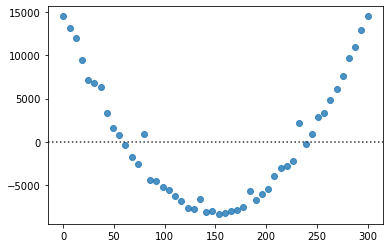

In [25]:
sns.residplot(x=x1, y=y1)

<AxesSubplot:>

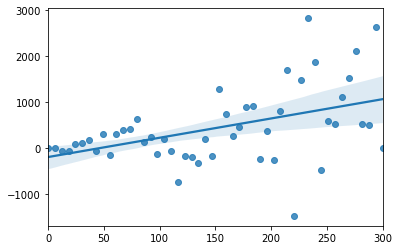

In [26]:
y1 = x1 + np.random.normal(scale=5, size=50)* x1
sns.regplot(x=x1, y=y1)

<AxesSubplot:>

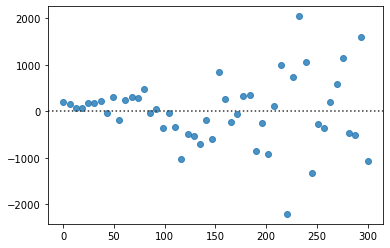

In [27]:
sns.residplot(x=x1, y=y1)

(0.0, 14.1)

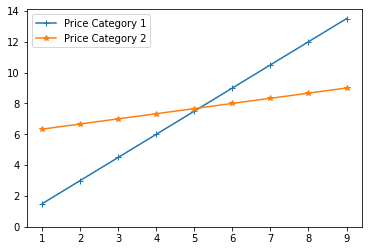

In [28]:
x = np.arange(1, 10)
y = 1.5 * x
y1 = x / 3 + 6
plt.plot(x, y, marker="+", label="Price Category 1")
plt.plot(x, y1, marker="*", label="Price Category 2")
plt.legend()
plt.ylim(0)

H:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


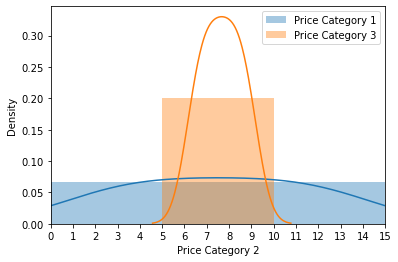

In [29]:
y = pd.Series(y, name="Price Category 1")
y1 = pd.Series(y1, name="Price Category 2")
sns.distplot(y, bins=np.linspace(0, 15, 4), label="Price Category 1")
sns.distplot(y1, bins=np.linspace(0, 15, 4), label="Price Category 3")
plt.xlim(0, 15)
plt.xticks(ticks=np.arange(0, 16))
plt.legend()

H:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


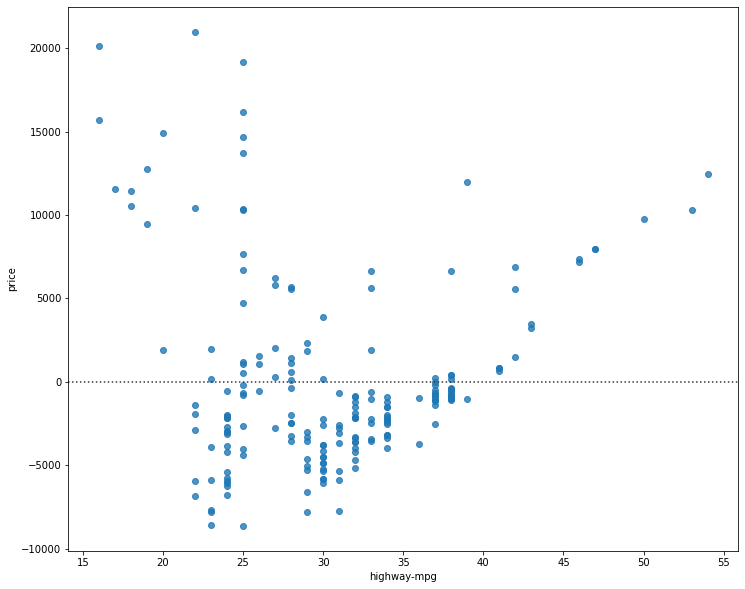

In [30]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [31]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Yhat = mlr.predict(Z)

H:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
H:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


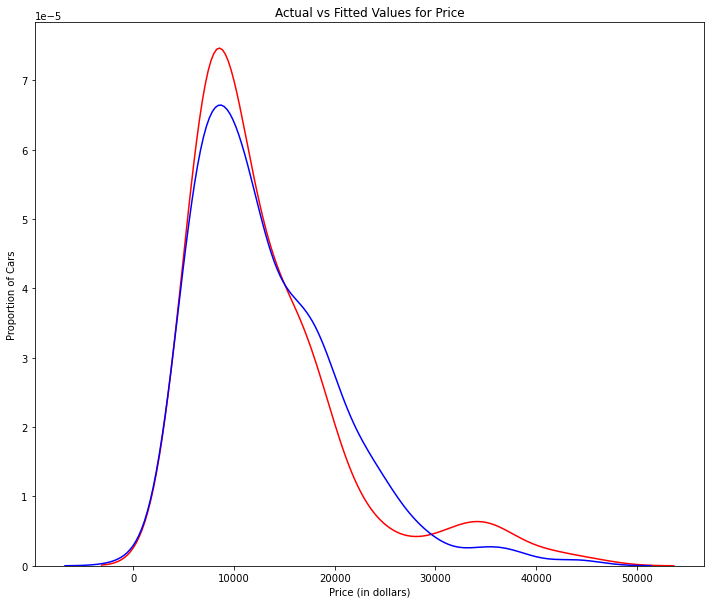

In [32]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [33]:
X = df[['highway-mpg']]
Yhat = lr.predict(X)

H:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
H:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


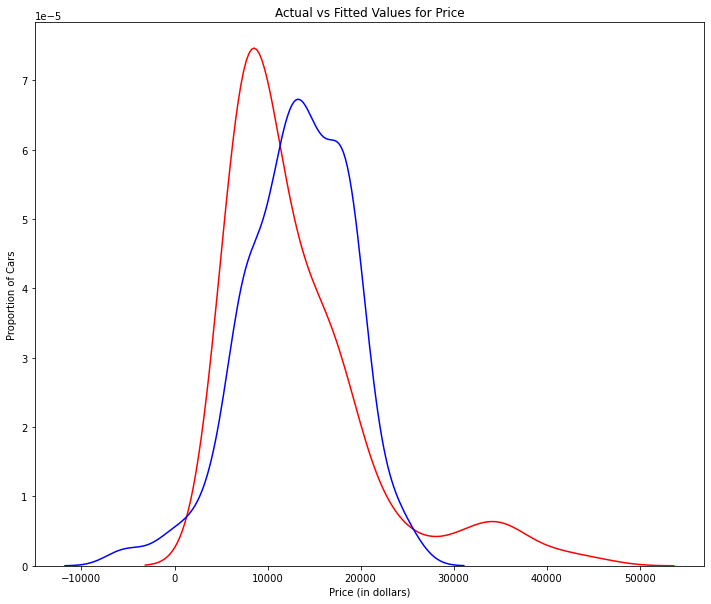

In [34]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

H:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

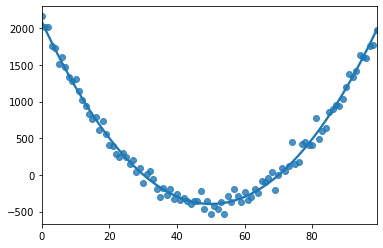

In [42]:
x = np.arange(0, 100)
y = (x - 30) * (x - 70) + np.random.normal(0.0, 80.0, size=100)
sns.regplot(x, y, order=2)

H:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

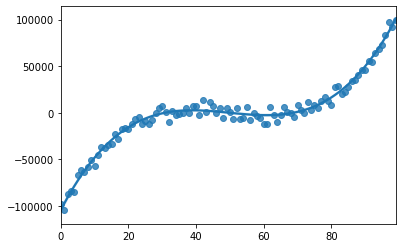

In [46]:
x = np.arange(0, 100)
y = (x - 30) * (x - 70) * (x - 50) + np.random.normal(0.0, 5000.0, size=100)
sns.regplot(x, y, order=3)

In [48]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
xpoly = pr.fit_transform(df[['horsepower', 'curb-weight']])
xpoly

array([[1.0000000e+00, 1.1100000e+02, 2.5480000e+03, 1.2321000e+04,
        2.8282800e+05, 6.4923040e+06],
       [1.0000000e+00, 1.1100000e+02, 2.5480000e+03, 1.2321000e+04,
        2.8282800e+05, 6.4923040e+06],
       [1.0000000e+00, 1.5400000e+02, 2.8230000e+03, 2.3716000e+04,
        4.3474200e+05, 7.9693290e+06],
       ...,
       [1.0000000e+00, 1.3400000e+02, 3.0120000e+03, 1.7956000e+04,
        4.0360800e+05, 9.0721440e+06],
       [1.0000000e+00, 1.0600000e+02, 3.2170000e+03, 1.1236000e+04,
        3.4100200e+05, 1.0349089e+07],
       [1.0000000e+00, 1.1400000e+02, 3.0620000e+03, 1.2996000e+04,
        3.4906800e+05, 9.3758440e+06]])

In [52]:
sdf = pd.DataFrame(data={'X1': [1,2], 'X2': [2,3]}) 
pr = PolynomialFeatures(degree=2)
xp = pr.fit_transform(sdf)
xp

array([[1., 1., 2., 1., 2., 4.],
       [1., 2., 3., 4., 6., 9.]])

In [53]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df[['horsepower', 'highway-mpg']])
x_scale = scale.transform(df[['horsepower', 'highway-mpg']])
x_scale

array([[ 0.20375448, -0.54228772],
       [ 0.20375448, -0.54228772],
       [ 1.3574159 , -0.689386  ],
       [-0.03770954, -0.10099285],
       [ 0.31107182, -1.27777915],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.9818052 , -1.57197573],
       [-0.06453888, -0.24809114],
       [-0.06453888, -0.24809114],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.83648429],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.57197573],
       [-1.48649365,  3.28226775],
       [-0.89624827,  1.81128488],
       [-0.89624827,  1.81128488],
       [-0.94990694,  1.51708831],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.41332024, -0.10099285],
       [ 1.11595188,

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

input_ = [
    ("scale", StandardScaler()),
    ("Polynomial", PolynomialFeatures()),
    ("model", LinearRegression())
]

pipe = Pipeline(input_)

X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

pipe.fit(X, y)

yhat = pipe.predict(X)

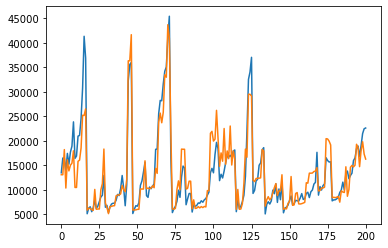

In [59]:
plt.plot(y)
plt.plot(yhat)

$ MSE = \frac{1}{n}\sum_{i=1}^{n} (\hat{y} - y) $



<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, yhat)

9656613.4039896

$R^2 = 1 - \frac{MSE_{\hat{y}}}{MSE_{\bar{y}}}$
<br><br><br><br><br>

In [62]:
lr = LinearRegression()
X = df[['highway-mpg']]
y = df['price']
lr.fit(X, y)
lr.score(X, y)

0.4965911884339176